# Hapi

## Conceptual Distributed Hydrological Model

- Please change the Path in the following cell to the directory where you stored the case study data

In [1]:
import os
Path = "F:/02Case studies/Coello"
os.chdir(Path)

### Import Modules

In [3]:
import datetime as dt
from Hapi.run import Run
from Hapi.catchment import Catchment
import Hapi.rrm.hbv_bergestrom92 as HBV

### Paths

In [4]:
# PrecPath = path + "meteodata/4000/calib/prec" #
PrecPath = "Hapi/Data/00inputs/meteodata/4000/calib/prec-CPC-NOAA" #
# PrecPath = "Hapi/Data/00inputs/meteodata/4000/calib/prec-MSWEP" #
Evap_Path = "Hapi/Data/00inputs/meteodata/4000/calib/evap"
TempPath = "Hapi/Data/00inputs/meteodata/4000/calib/temp"
FlowAccPath = "Hapi/Data/00inputs/GIS/4000/acc4000.tif"
FlowDPath = "Hapi/Data/00inputs/GIS/4000/fd4000.tif"
ParPathRun = "Hapi/Model/results/parameters/02lumped parameters/Parameter set-1/"
# ParPathRun = "Hapi/Model/results/parameters/02lumped parameters/Parameter set-Avg/"
SaveTo = "Hapi/Model/results/"

### Meteorological data

In [5]:
AreaCoeff = 1530
InitialCond = [0,5,5,5,0]
Snow = 0
"""
Create the model object and read the input data
"""
start = "2009-01-01"
end = "2011-12-31"
name = "Coello"
Coello = Catchment(name, start, end, SpatialResolution = "Distributed")
Coello.ReadRainfall(PrecPath)
Coello.ReadTemperature(TempPath)
Coello.ReadET(Evap_Path)

Coello.ReadFlowAcc(FlowAccPath)
Coello.ReadFlowDir(FlowDPath)
Coello.ReadParameters(ParPathRun, Snow)
Coello.ReadLumpedModel(HBV, AreaCoeff, InitialCond)

Rainfall data are read successfully
Temperature data are read successfully
Potential Evapotranspiration data are read successfully
Flow Accmulation input is read successfully
Flow Direction input is read successfully
Parameters are read successfully
Lumped model is read successfully


## Gauges

In [6]:
Coello.ReadGaugeTable("Hapi/Data/00inputs/Discharge/stations/gauges.csv", FlowAccPath)
GaugesPath = "Hapi/Data/00inputs/Discharge/stations/"
Coello.ReadDischargeGauges(GaugesPath, column='id', fmt="%Y-%m-%d")

Gauge Table is read successfully
Gauges data are read successfully


In [15]:
Coello.GaugesTable

,id,name,x,y,original area,area,area ratio,weight,cell_row,cell_col
0,1,Station 1,454795.6728,503143.3264,124.0659,64,1.938530,0.06,4.0,5.0
1,2,Station 2,443847.5736,481850.7151,83.0025,96,0.864609,0.08,9.0,2.0
2,3,station 3,454044.6935,481189.4256,44.8587,16,2.803669,0.02,9.0,5.0
3,4,Station 4,464533.7067,502683.6482,91.4949,80,1.143686,0.07,4.0,7.0
4,5,Station 5,463231.1242,486656.3455,730.1259,784,0.931283,0.38,8.0,7.0
5,6,ExitPoint_coello basin,487292.5152,478045.5720,1453.9185,1408,1.032613,0.40,10.0,13.0


# Run the model

Outputs:
----------
    1-statevariables: [numpy attribute]
        4D array (rows,cols,time,states) states are [sp,wc,sm,uz,lv]
    2-qlz: [numpy attribute]
        3D array of the lower zone discharge
    3-quz: [numpy attribute]
        3D array of the upper zone discharge
    4-qout: [numpy attribute]
        1D timeseries of discharge at the outlet of the catchment
        of unit m3/sec
    5-quz_routed: [numpy attribute]
        3D array of the upper zone discharge  accumulated and
        routed at each time step
    6-qlz_translated: [numpy attribute]
        3D array of the lower zone discharge translated at each time step


In [8]:
Run.RunHapi(Coello)

Model Run has finished


In [12]:
import numpy as np
np.shape(Coello.Qtot)

(13, 14, 1096)

In [18]:
Coello.GaugesTable['area ratio'].tolist()

[1.938529688, 0.864609375, 2.80366875, 1.14368625, 0.931283036, 1.032612571]

In [16]:
Coello.ExtractDischarge()

for i in range(len(Coello.GaugesTable)):
    gaugeid = Coello.GaugesTable.loc[i,'id']
    print("----------------------------------")
    print("Gauge - " +str(gaugeid))
    print("RMSE= " + str(round(Coello.Metrics.loc['RMSE',gaugeid],2)))
    print("NSE= " + str(round(Coello.Metrics.loc['NSE',gaugeid],2)))
    print("NSEhf= " + str(round(Coello.Metrics.loc['NSEhf',gaugeid],2)))
    print("KGE= " + str(round(Coello.Metrics.loc['KGE',gaugeid],2)))
    print("WB= " + str(round(Coello.Metrics.loc['WB',gaugeid],2)))
    print("Pearson CC= " + str(round(Coello.Metrics.loc['Pearson-CC',gaugeid],2)))
    print("R2 = " + str(round(Coello.Metrics.loc['R2',gaugeid],2)))

----------------------------------
Gauge - 1
RMSE= 7.55
NSE= -0.88
NSEhf= -0.74
KGE= -0.18
WB= 41.01
Pearson CC= 0.01
R2 = -0.88
----------------------------------
Gauge - 2
RMSE= 3.72
NSE= -0.4
NSEhf= -0.13
KGE= 0.09
WB= 81.98
Pearson CC= 0.02
R2 = -0.4
----------------------------------
Gauge - 3
RMSE= 2.36
NSE= -0.48
NSEhf= -0.36
KGE= -0.17
WB= 49.29
Pearson CC= 0.03
R2 = -0.48
----------------------------------
Gauge - 4
RMSE= 12.62
NSE= -1.18
NSEhf= -0.9
KGE= -0.22
WB= 29.66
Pearson CC= 0.05
R2 = -1.18
----------------------------------
Gauge - 5
RMSE= 26.98
NSE= -14.99
NSEhf= -5.14
KGE= -1.76
WB= -106.18
Pearson CC= 0.05
R2 = -14.99
----------------------------------
Gauge - 6
RMSE= 42.03
NSE= -1.57
NSEhf= -0.51
KGE= 0.08
WB= 62.0
Pearson CC= 0.06
R2 = -1.57


In [19]:
Coello.Metrics

,1,2,3,4,5,6
RMSE,7.547,3.715,2.356,12.616,26.979,42.027
NSE,-0.883,-0.397,-0.475,-1.181,-14.987,-1.57
NSEhf,-0.74,-0.129,-0.36,-0.897,-5.137,-0.511
KGE,-0.176,0.088,-0.167,-0.222,-1.764,0.078
WB,41.011,81.982,49.291,29.661,-106.177,61.997
Pearson-CC,0.013,0.023,0.028,0.047,0.051,0.056
R2,-0.883,-0.397,-0.475,-1.181,-14.987,-1.57


In [25]:
Coello.Qtot[0,0,0]

0.0

### Calculate performance criteria

### Plot Hydrographs

----------------------------------
Gauge - 6
RMSE= 42.03
NSE= -1.57
NSEhf= -0.51
KGE= 0.08
WB= 62.0
Pearson-CC= 0.06
R2= -1.57


(<Figure size 432x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Gauge - ExitPoint_coello basin'}, xlabel='Time', ylabel='Discharge m3/s'>)

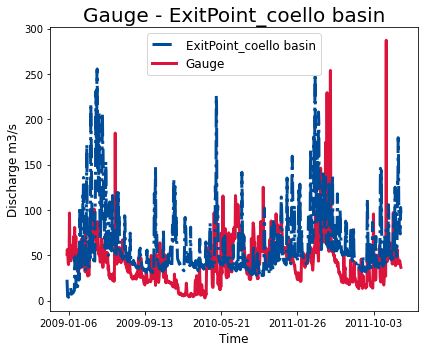

In [43]:
gaugei = 5
plotstart = "2009-01-01"
plotend = "2011-12-31"

Coello.PlotHydrograph(plotstart, plotend, gaugei)

In [ ]:
Coello.ListAttributes().keys()

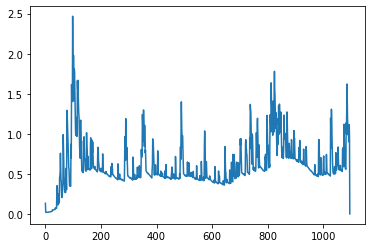

In [42]:
import matplotlib.pyplot as plt
plt.plot(Coello.Qtot[12,1,:])

### Animation

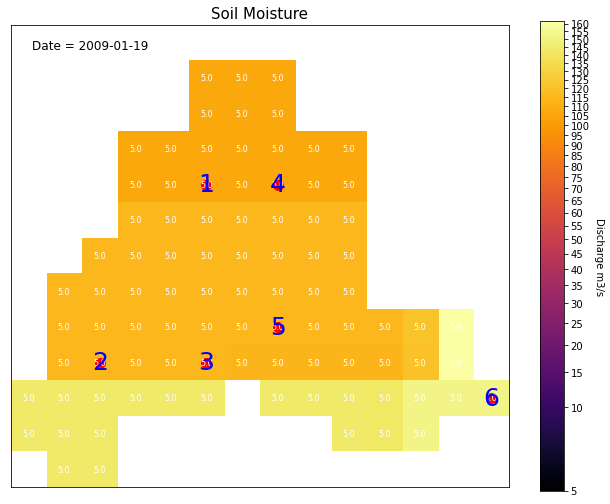

In [49]:
%matplotlib inline
from IPython.display import HTML
plotstart = "2009-01-01"
plotend = "2009-01-20"
Option = 5
threshold=10

Anim = Coello.PlotDistributedResults(plotstart, plotend, Figsize=(9,9), Option = Option, threshold=160, PlotNumbers=False,
                                TicksSpacing = 5,Interval = 200, Gauges=True, cmap='inferno', Textloc=[0.1,0.2],
                                Gaugecolor='red',ColorScale = 2, IDcolor='blue', IDsize=25)
HTML(Anim.to_html5_video())

- if you like to save the animation

In [45]:
Path = SaveTo + "anim.mov"
Coello.SaveAnimation(VideoFormat="mov",Path=Path,SaveFrames=3)

# 11-Store the result into rasters

In [46]:
StartDate = "2009-01-01"
EndDate = "2010-04-20"
Prefix = 'Qtot_'

Coello.SaveResults(FlowAccPath, Result=1, StartDate=StartDate, EndDate=EndDate,
                    Path=SaveTo, Prefix=Prefix)

Data is saved successfully


In [47]:
Path

'Hapi/Model/results/anim.mov'